In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Loading of data

In [8]:
df = pd.read_csv("drugclassification.csv")

Information of data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Visualising dataframe

In [10]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Seperation of input and target data

In [11]:
inputs_val = df.drop('Drug',axis='columns')
target_val = df['Drug']

Applying label encoder

In [12]:
from sklearn.preprocessing import LabelEncoder
sex_up = LabelEncoder()
bp_up = LabelEncoder()
cho_up = LabelEncoder()

In [14]:
inputs_val['sex_up'] = sex_up.fit_transform(inputs_val['Sex'])
inputs_val['bp_up'] = bp_up.fit_transform(inputs_val['BP'])
inputs_val['cho_up'] = cho_up.fit_transform(inputs_val['Cholesterol'])

In [15]:
inputs_val

,Age,Sex,BP,Cholesterol,Na_to_K,sex_up,bp_up,cho_up
0,23,F,HIGH,HIGH,25.355,0,0,0
1,47,M,LOW,HIGH,13.093,1,1,0
2,47,M,LOW,HIGH,10.114,1,1,0
3,28,F,NORMAL,HIGH,7.798,0,2,0
4,61,F,LOW,HIGH,18.043,0,1,0
...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,0,1,0
196,16,M,LOW,HIGH,12.006,1,1,0
197,52,M,NORMAL,HIGH,9.894,1,2,0
198,23,M,NORMAL,NORMAL,14.020,1,2,1


In [21]:
inputs_n = inputs_val.drop(['Age','Sex','BP','Cholesterol'],axis='columns')

In [22]:
inputs_n

,Na_to_K,sex_up,bp_up,cho_up
0,25.355,0,0,0
1,13.093,1,1,0
2,10.114,1,1,0
3,7.798,0,2,0
4,18.043,0,1,0
...,...,...,...,...
195,11.567,0,1,0
196,12.006,1,1,0
197,9.894,1,2,0
198,14.020,1,2,1


Formation of decision tree

In [23]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

fitting the data into decision tree

In [24]:
dt.fit(inputs_n, target_val)

DecisionTreeClassifier()

In [25]:
dt.score(inputs_n,target_val)

1.0

Prediction of Drug

In [26]:
dt.predict([[25.355,0,0,0]])

C:\Users\astha\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['DrugY'], dtype=object)

In [27]:
dt.predict([[12.56,0,1,2]])

C:\Users\astha\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['drugX'], dtype=object)

[Text(0.703125, 0.9615384615384616, 'X[0] <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [91, 23, 16, 16, 54]'),
 Text(0.640625, 0.8846153846153846, 'X[2] <= 0.5\ngini = 0.667\nsamples = 109\nvalue = [0, 23, 16, 16, 54]'),
 Text(0.40625, 0.8076923076923077, 'X[0] <= 13.623\ngini = 0.484\nsamples = 39\nvalue = [0, 23, 16, 0, 0]'),
 Text(0.25, 0.7307692307692307, 'X[0] <= 8.316\ngini = 0.457\nsamples = 34\nvalue = [0, 22, 12, 0, 0]'),
 Text(0.1875, 0.6538461538461539, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0]'),
 Text(0.3125, 0.6538461538461539, 'X[0] <= 10.24\ngini = 0.475\nsamples = 31\nvalue = [0, 19, 12, 0, 0]'),
 Text(0.1875, 0.5769230769230769, 'X[0] <= 9.67\ngini = 0.48\nsamples = 10\nvalue = [0, 4, 6, 0, 0]'),
 Text(0.125, 0.5, 'X[0] <= 8.661\ngini = 0.444\nsamples = 6\nvalue = [0, 4, 2, 0, 0]'),
 Text(0.0625, 0.4230769230769231, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]'),
 Text(0.1875, 0.4230769230769231, 'X[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1

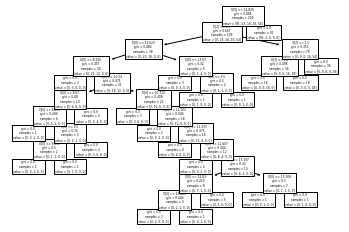

In [28]:
tree.plot_tree(dt)